Q-STAR 量子重ね合わせ部会・量子HPC連携活用部会 共催
# Qiskit入門ハンズオン 

Ryuki Tachibana, IBM Quantum, Jan 23 2026</br>
© 2026 International Business Machines Corporation

## 事前準備

[ここのページ](https://ibm.biz/start-qtokyo)を参照して、(1) Google Colab上でQiskitの環境構築 と (2) IBM Quantumアカウントの設定をしてください。


## １量子ビット回路
まず1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

In [1]:
# Google Colabで実行している方は以下の # を取り除いてインストールを実行してください

#!pip install 'qiskit[visualization]' qiskit-ibm-runtime qiskit-aer

### 空の回路

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


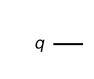

In [1]:
from qiskit import QuantumCircuit
# １量子ビット回路を用意
qc = QuantumCircuit(1)

# 回路を描画
qc.draw(output="mpl")

### Xゲート

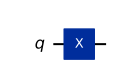

In [2]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 回路を描画
qc.draw(output="mpl")

IBM Quantumでは、初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


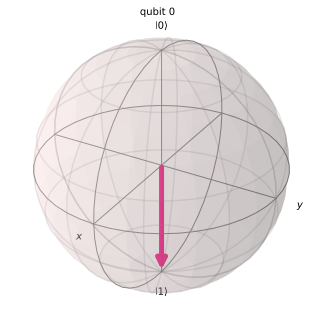

In [3]:
from qiskit_aer import StatevectorSimulator
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は j )で表示されています。

### Hゲート

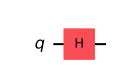

In [4]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


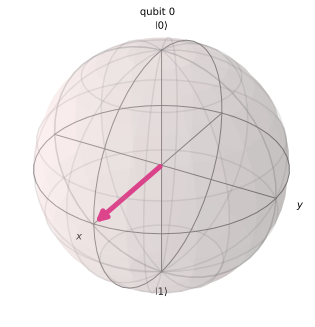

In [5]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。

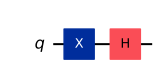

In [6]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


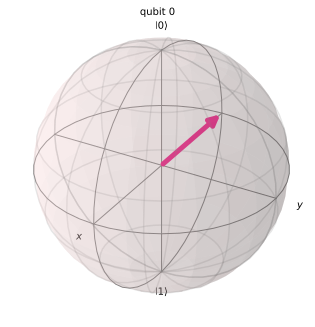

In [7]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。

## 演習1
次の量子回路をプログラミングし、状態ベクトルシミュレーターで実行して、ブロッホ球を表示してみましょう。

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $ZH|1\rangle$

ヒント：Zゲートは、

    qc.z(0)
    
とかきます。新しいセルを追加したい場合は、上側の「+」を選択するか、キーボードの「B」を押します。

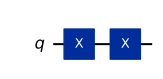

In [8]:
### (1) XX|0> ###

# １量子ビット回路を用意 
##コードを記入します##
qc = QuantumCircuit(1)

# Xゲートを0番目の量子ビットに操作します。
##コードを記入します##
qc.x(0)

# もう一度、Xゲートを0番目の量子ビットに操作します。
##コードを記入します##
qc.x(0)
# 回路を描画
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


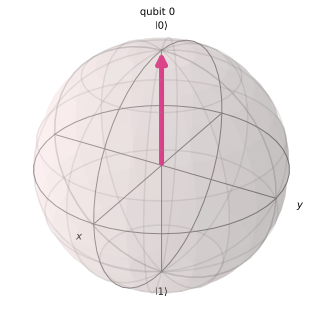

In [9]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

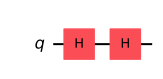

In [10]:
### (2) HH|0> ###
##コードを記入します##
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw("mpl")

Statevector([1.-0.j, 0.+0.j],
            dims=(2,))


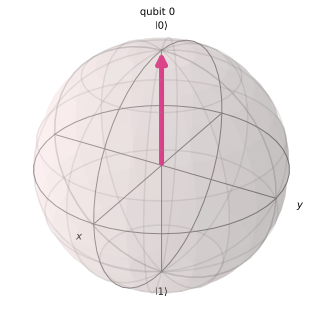

In [11]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

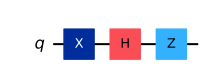

In [12]:
### (3) ZH|1> ###
##コードを記入します##
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.z(0)
qc.draw("mpl")

Statevector([0.707-0.j, 0.707-0.j],
            dims=(2,))


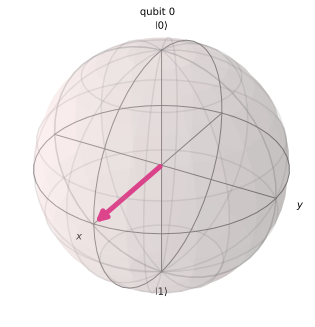

In [13]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

## 2量子ビット回路

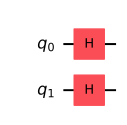

In [14]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Hゲートを1番目の量子ビットに操作します。
qc.h(1)

# 回路を描画
qc.draw(output="mpl")

In [15]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


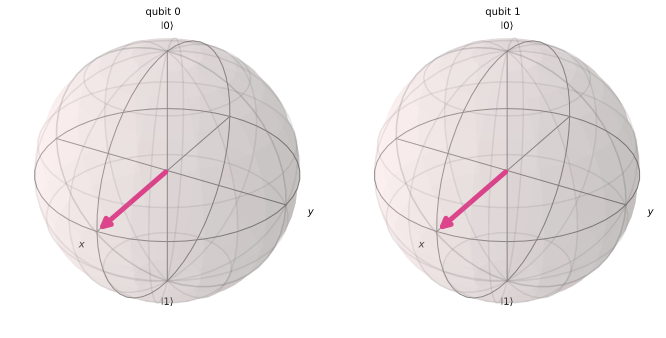

In [16]:
# ブロッホ球の表示
plot_bloch_multivector(result)

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

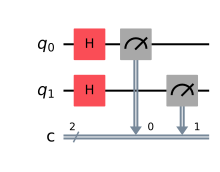

In [17]:
# ２量子ビットと2古典ビットの回路を作成します。
qc = QuantumCircuit(2,2)

# ゲートを適用します。
qc.h(0)
qc.h(1)

# 測定ゲートを追加
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

次に量子計算シミュレーターで計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

 > Counts: {'01': 252, '00': 260, '11': 257, '10': 255}


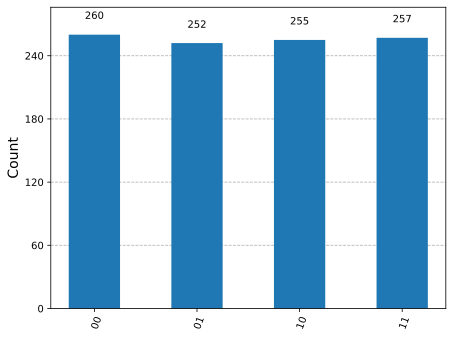

In [18]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

次は、$CNOT$ゲート（$CX$ゲート）の実験を行います。

$CNOT$ゲートは、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。

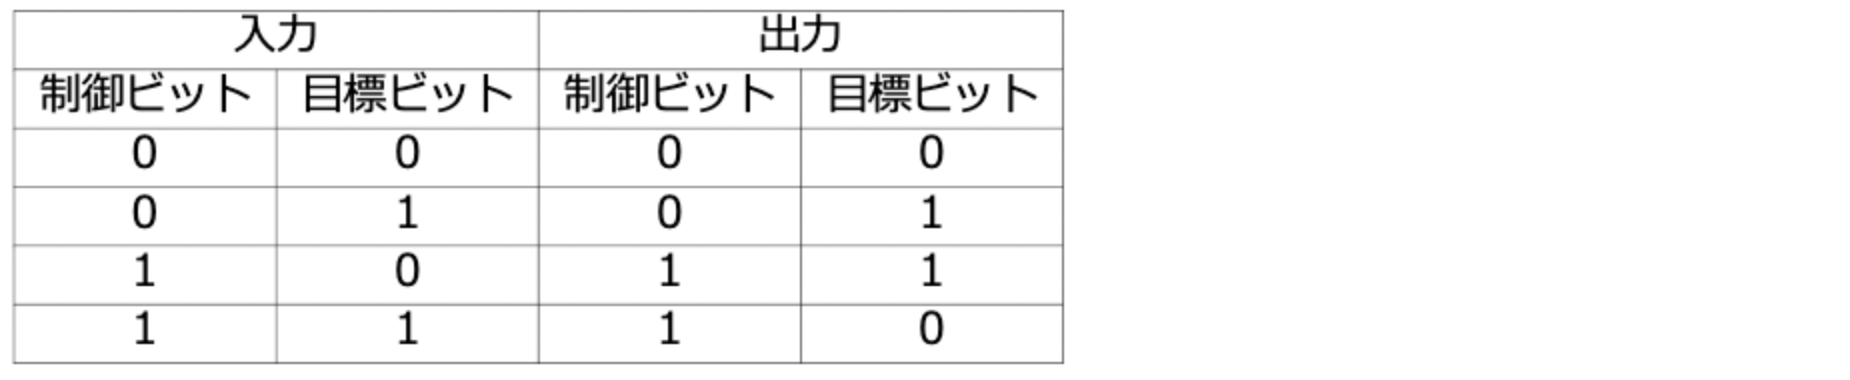

まず、q0とq1が両方とも0の場合を計算してみましょう。

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


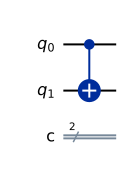

In [19]:
# ２量子ビット回路を作成します。 
qc = QuantumCircuit(2,2)

# q0, q1が0の場合
qc.cx(0,1)   # CNOTゲートの制御ビットをq0、目標ビットをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [20]:
## 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。

次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、多くの量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。


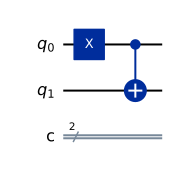

In [21]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0の場合
qc.x(0)    # q0を1にします。
qc.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [22]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

シミュレーターで計算してみましょう。

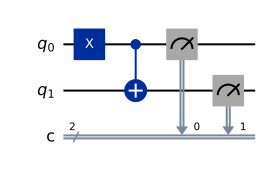

In [23]:
# 回路を測定
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

 > Counts: {'11': 1024}


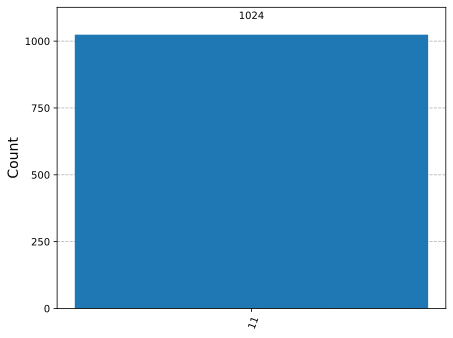

In [24]:
# Samplerで実行
sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

$|11\rangle$の状態が100%測定されます。


## 量子もつれ
エンタングルメント状態を作り実デバイスで測定してみます。

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態を指します。
量子テレポーテーションなどで利用されます。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>

上記の状態をつくるには、まず片方の量子ビットを重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

その後、CXゲートを作用させます。量子ビット0をコントロールビット、量子ビット1をターゲットビットとします。すると、右側が1の量子ビットに対して、残った方の量子ビットを反転させます。
$$ CX(\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$



/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


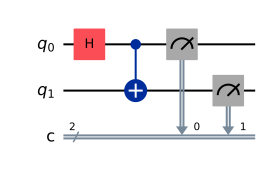

In [25]:
# 2量子ビット回路の用意
qc = QuantumCircuit(2,2) 

# 2量子ビットのエンタングルメント回路の作成
qc.h(0)
qc.cx(0,1)

# 回路を測定
qc.measure(0,0)
qc.measure(1,1)

# 回路を描画
qc.draw(output="mpl")

まずシミュレーターで実行して結果を確認します。

 > Counts: {'11': 519, '00': 505}


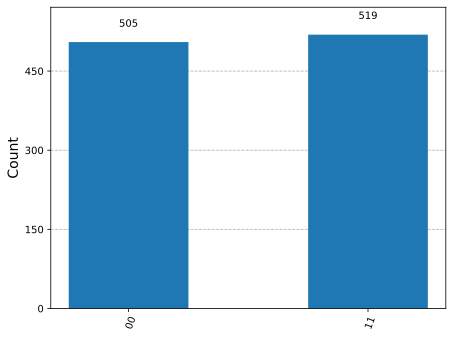

In [26]:
# Samplerで実行
sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

## フェイクデバイスでの実行

量子コンピューターの実機の挙動を模擬したソフトウェアシミュレーターが利用可能です。

In [27]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeFez

# Get a fake backend from the fake provider
backend = FakeFez()

In [28]:
# デバイスの情報を取得して表示
configuration = backend.configuration()
print("Backend Name:", configuration.backend_name)
print("Number of Qubits:", configuration.num_qubits)
print("Basis Gates:", configuration.basis_gates)
print("Coupling Map:", configuration.coupling_map)

Backend Name: fake_fez
Number of Qubits: 156
Basis Gates: ['cz', 'id', 'rz', 'sx', 'x']
Coupling Map: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [3, 16], [4, 3], [4, 5], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [7, 17], [8, 7], [8, 9], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [11, 18], [12, 11], [12, 13], [13, 12], [13, 14], [14, 13], [14, 15], [15, 14], [15, 19], [16, 3], [16, 23], [17, 7], [17, 27], [18, 11], [18, 31], [19, 15], [19, 35], [20, 21], [21, 20], [21, 22], [21, 36], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 37], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 38], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 34], [33, 39], [34, 33], [34, 35], [35, 19], [35, 34], [36, 21], [36, 41], [37, 25], [37, 45], [38, 29], [38, 49], [39, 33], [39, 53], [40, 41], [41, 36], [41, 40], [41, 42], [42, 41], [42, 43],

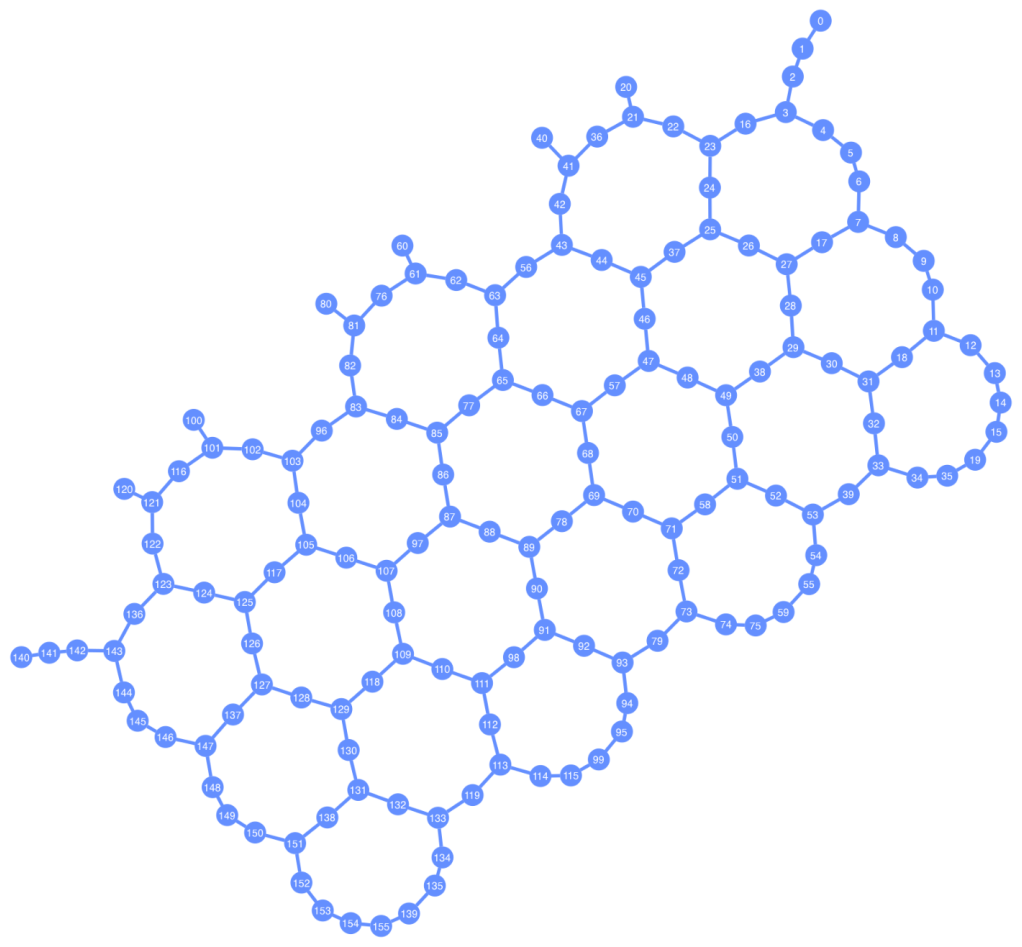

In [29]:
from qiskit.visualization import plot_gate_map

# このデバイスでの量子ビットの配置を表示します
plot_gate_map(backend)

In [30]:
# 0番目の量子ビットのプロパティ情報を取得して表示

# Retrieve qubit properties
qubit_index = 0  # Replace with your qubit index
qubit_props = backend.properties().qubit_property(qubit_index)
 
# Access specific properties
t1 = qubit_props.get("T1", (None,))[0]
t2 = qubit_props.get("T2", (None,))[0]
frequency = qubit_props.get("frequency", (None,))[0]
anharmonicity = qubit_props.get("anharmonicity", (None,))[0]
readout_error = qubit_props.get("readout_error", (None,))[0]
prob_meas0_prep1 = qubit_props.get("prob_meas0_prep1", (None,))[0]
prob_meas1_prep0 = qubit_props.get("prob_meas1_prep0", (None,))[0]
readout_length = qubit_props.get("readout_length", (None,))[0]
 
print(f"Qubit {qubit_index} Properties:")
print(f"  T1: {t1} seconds")
print(f"  T2: {t2} seconds")
print(f"  Frequency: {frequency} Hz")
print(f"  Anharmonicity: {anharmonicity} Hz")
print(f"  Readout Error: {readout_error}")
print(f"  P(0 | 1): {prob_meas0_prep1}")
print(f"  P(1 | 0): {prob_meas1_prep0}")
print(f"  Readout Length: {readout_length} seconds")

Qubit 0 Properties:
  T1: 4.880620782230333e-05 seconds
  T2: 4.2379597486132065e-05 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.011474609375
  P(0 | 1): 0.017578125
  P(1 | 0): 0.00537109375
  Readout Length: 1.56e-06 seconds


次にこのフェイクデバイス上で量子回路を実行してみます

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


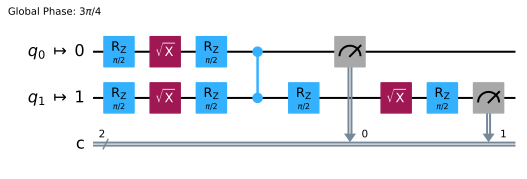

In [32]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# 回路を実機で実行可能な基本のゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [33]:
# Samplerで実行します
sampler = SamplerV2(backend)
job = sampler.run([isa_circuit]) # デフォルトのショット数は4096です

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

job id: 046bd29f-b6c4-47c2-bb88-8021e795748c


In [36]:
# 実行状態を確認します
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [37]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

{'11': 473, '00': 521, '10': 20, '01': 10}


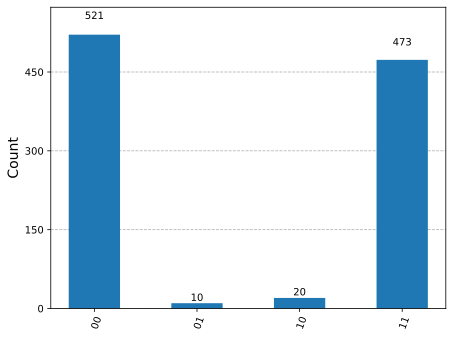

In [38]:
from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())

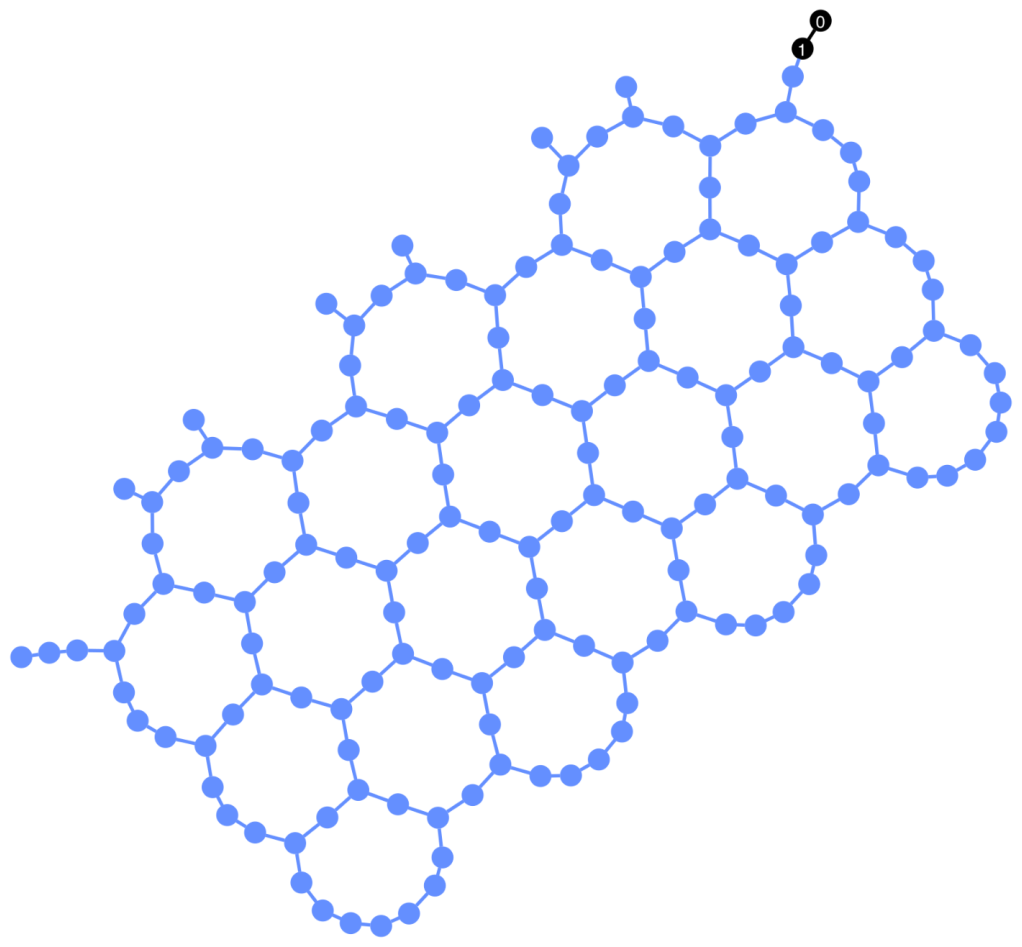

In [39]:
from qiskit.visualization import plot_circuit_layout

# Fezには 156個の物理量子ビットがあるうちのどの量子ビットがこの実行に使われるように、トランスパイルの際にレイアウトが行われたかみてみます
plot_circuit_layout(isa_circuit, backend)

模擬された実機のノイズによって、本来得られるはずではないサンプル値も得られている様子が確認できます。

## 実デバイスでの実行
### IBM Quantumで実行するための準備

実量子コンピューターで実験するため次の手順で、API keyとCRNを次のセルのコードに入力してください。 

1) 先ほど保存した「apikey.json」ファイルから、apikeyをコピーして、次のセルの `deleteThisAndPasteYourAPIKeyHere` に上書きしてください。
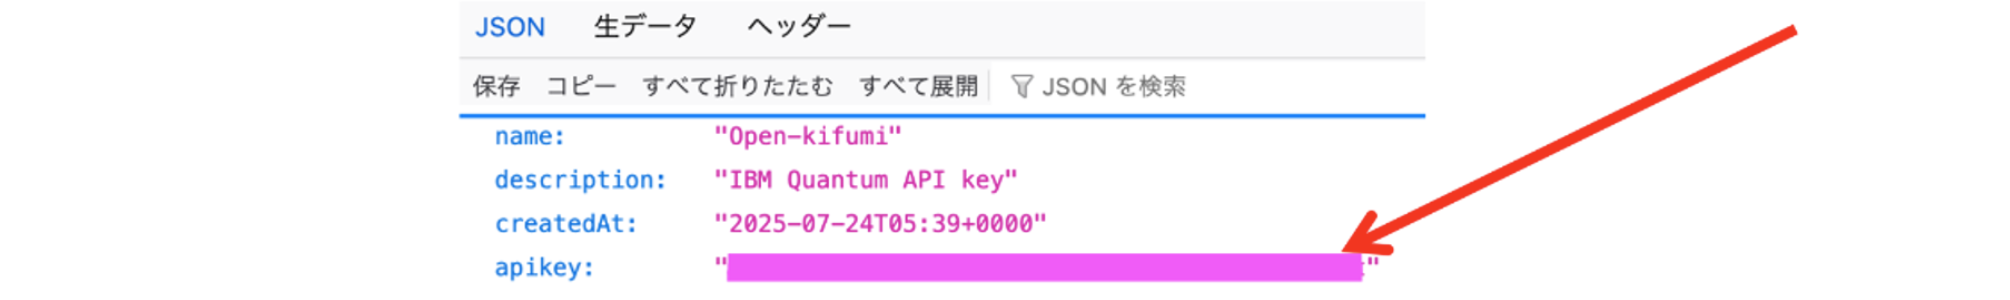

2) https://quantum.cloud.ibm.com/ にサインインし、CRNをコピーして、次のセルの `deleteThisAndPasteYourCRNHere` に上書きしてください。

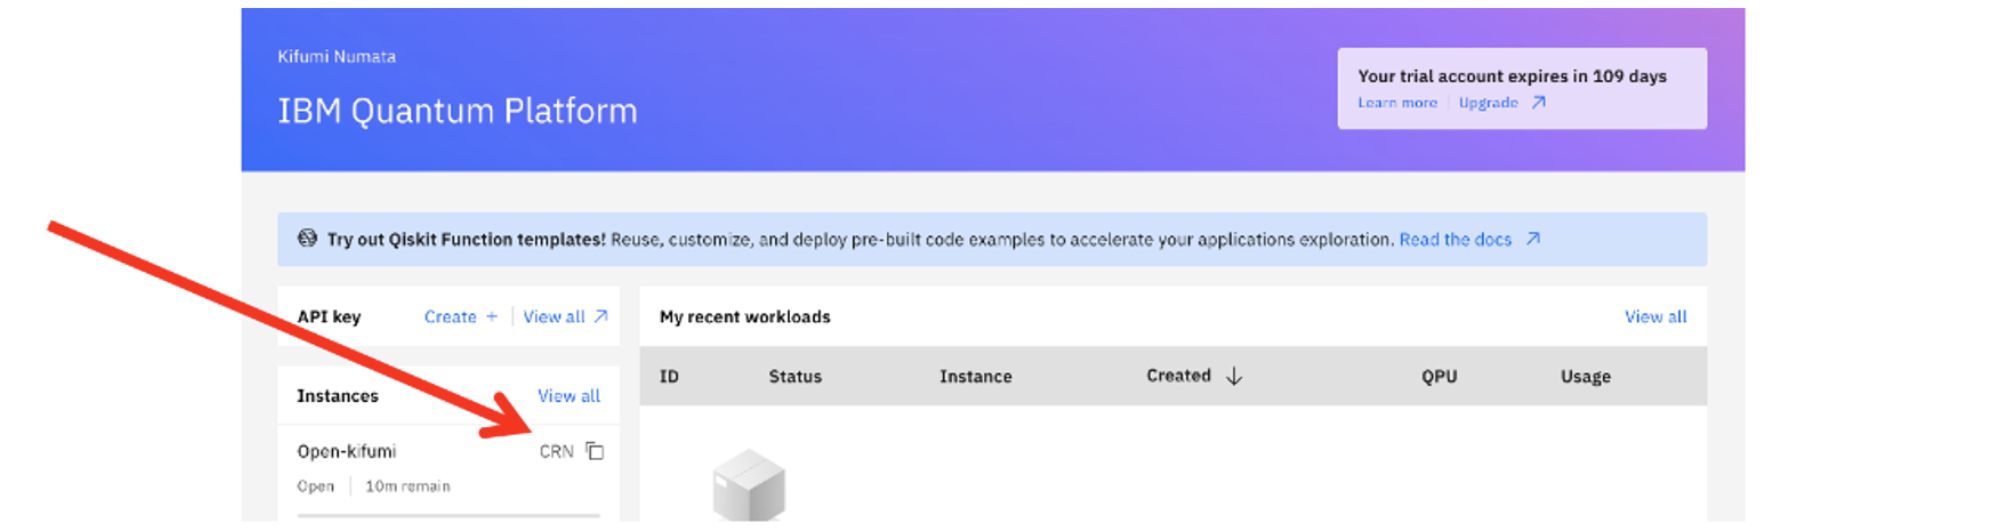

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

your_api_key = "deleteThisAndPasteYourAPIKeyHere"
your_crn = "deleteThisAndPasteYourCRNHere"

service = QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token=your_api_key, 
    instance=your_crn, 
    set_as_default=True, 
    overwrite=True,
)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_brisbane') 

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

In [ ]:
# 回路を実機で実行可能な基本のゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
sampler = Sampler(backend)
job = sampler.run([isa_circuit]) # デフォルトのショット数は4096です

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

In [ ]:
job = service.job(job.job_id()) 
#job = service.job("d33q9n50qhlc73cqqg1g") 
job.status() # ジョブの実行状態を確認します

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
job = service.job('d33q9n50qhlc73cqqg1g') # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status()

In [ ]:
# ジョブの実行状態を確認します
job.status()

上記のセルの実行の結果、'DONE' が表示されたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。

In [ ]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())

## 演習 2

(1) 次の量子状態を作る量子回路をQiskitで作ってください。
$$ |\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle  + |10\rangle) $$

ヒント： 上で作った基本のエンタングルメント状態 $ |\phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle  + |11\rangle) $ を作った後、あるゲートを一つ追加すると上記の状態 $ |\psi^+\rangle$ になります。この状態も２量子ビットのエンタングルメント状態の一つです。

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


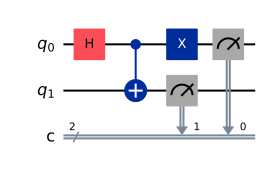

In [29]:
# 2量子ビット回路の用意
qc = QuantumCircuit(2, 2)##コードを記入します##

# 回路の作成
##コードを記入します##
qc.h(0)
qc.cx(0, 1)
qc.x(0)

# 回路を測定
##コードを記入します##
qc.measure(0, 0) 
qc.measure(1, 1) 

# 回路を描画
qc.draw(output="mpl")

(2) シミュレーターで実行して、結果をヒストグラムで表示してください。（実行するだけです）

 > Counts: {'00': 508, '11': 516}


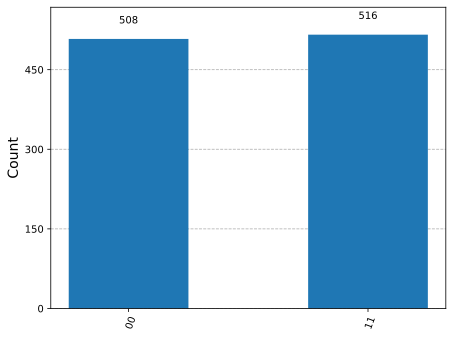

In [30]:
# Samplerで実行
sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

## GHZ状態

3量子ビット以上が完全にエンタングルした状態をGHZ状態 (Greenberger–Horne–Zeilinger state) と呼びます。

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

３量子ビットのGHZ状態は、次のような量子回路で作成することができます。

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


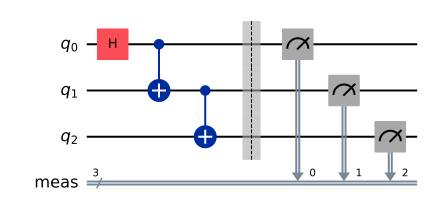

In [40]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure_all()

qc.draw("mpl")

量子回路の「深さ」は、量子回路を評価する指標としてよく使われます。

QuantumCircuit.depth()で、量子回路の深さを調べることができ、上の回路の深さは4です。


In [41]:
qc.depth()

4

## 演習 3

$8$ 量子ビットのGHZ状態は、以下のようになります。

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle)$$

この状態を最も浅い回路で作ってみましょう。最も浅い量子回路の depth は、測定ゲートを合わせて 5 です！

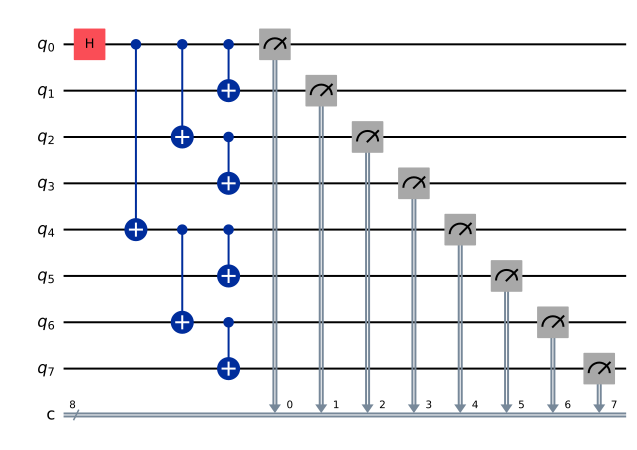

In [34]:
qc = QuantumCircuit(8,8)

# ここから下にコードを書きます

qc.h(0)
qc.cx(0,4)
qc.cx(4,6)
qc.cx(6,7)

qc.cx(4,5)

qc.cx(0,2)
qc.cx(2,3)

qc.cx(0,1)

# ここから上にコードを書きます

# 測定
for i in range(8):
    qc.measure(i, i)

qc.draw("mpl")
#print(qc.depth())

In [35]:
print(qc.depth())

5


 > Counts: {'11': 520, '00': 504}


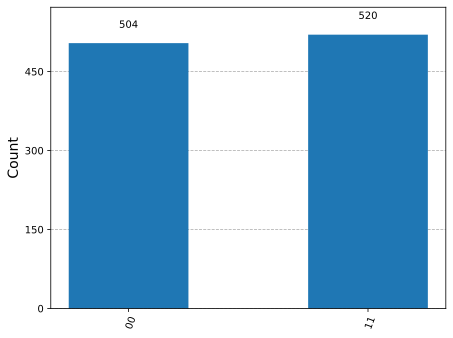

In [31]:
# Samplerで実行
sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

# より大きな GHZ状態の実験

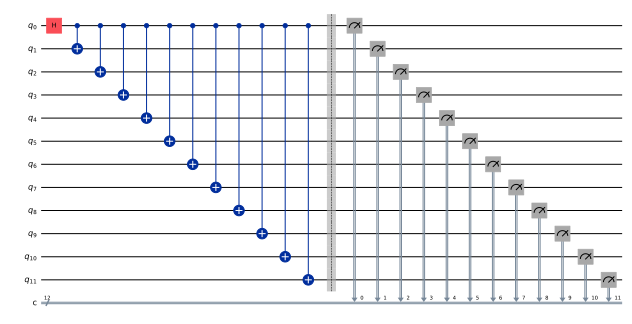

In [42]:
# 12量子ビット
n = 12
qc = QuantumCircuit(n,n)
qc.h(0)

for i in range(n-1):
    qc.cx(0,i+1)

qc.barrier()

# 測定
for i in range(n):
    qc.measure(i, i)

qc.draw("mpl", fold=-1, scale=0.5)

 > Counts: {'111111111111': 510, '000000000000': 514}


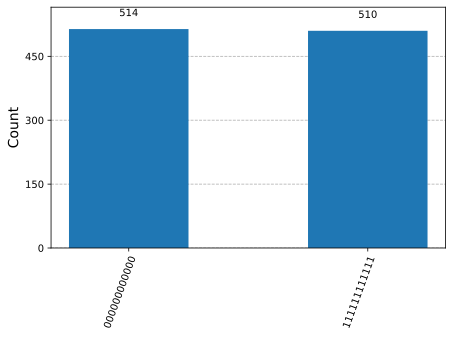

In [43]:
# Samplerで実行
sampler = StatevectorSampler()
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


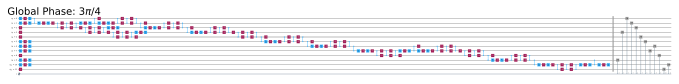

In [44]:
# 実機のバックエンドでの実行が可能な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False, fold=-1, scale=0.1)

In [45]:
print('Depth:', isa_circuit.depth())
print('Two-qubit Depth:', isa_circuit.depth(filter_function=lambda x: x.operation.num_qubits==2))

Depth: 129
Two-qubit Depth: 47


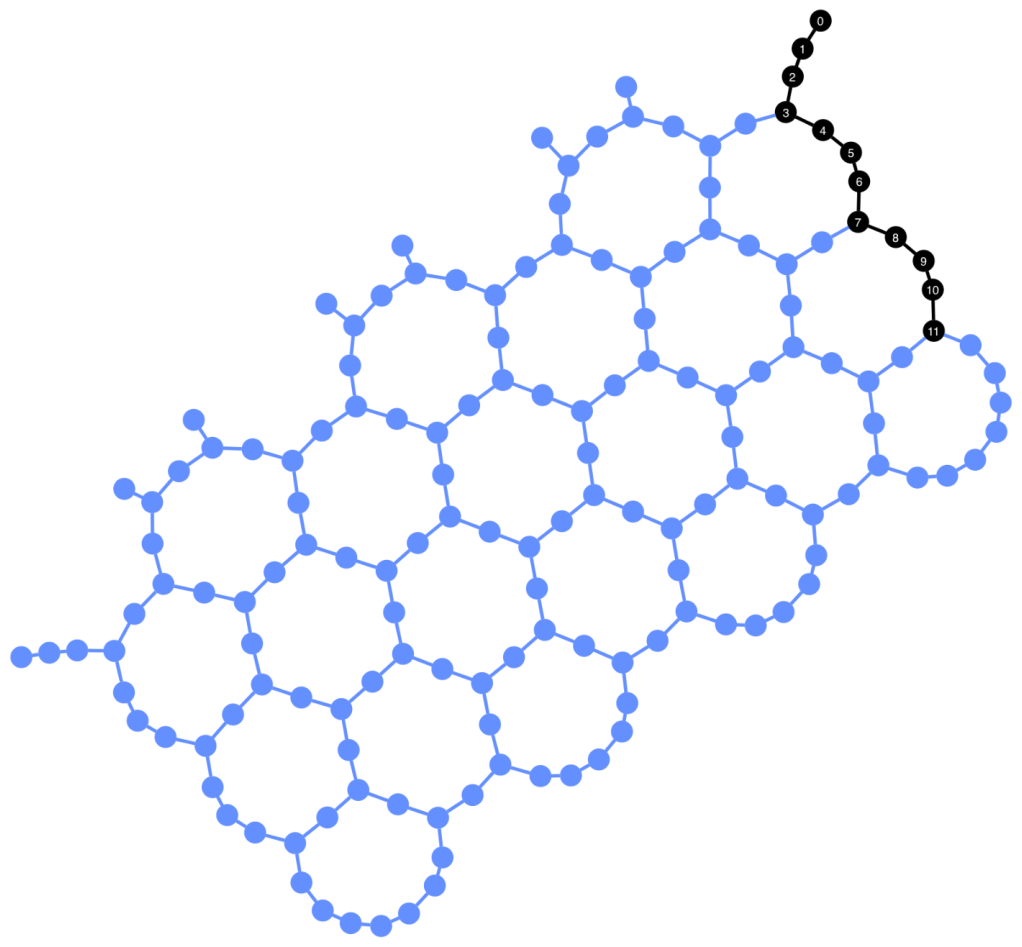

In [46]:
plot_circuit_layout(isa_circuit, backend)

In [48]:
sampler = SamplerV2(mode=backend)
shots = 40000
job = sampler.run([isa_circuit], shots = shots)
print("job id:", job.job_id())

job id: a52a283b-a9be-462f-8ba9-6af4f9e2d1a2


In [49]:
#job = service.job(job.job_id()) 
#job = service.job("d33q9n50qhlc73cqqg1g") 
job.status() # ジョブの実行状態を確認します

<JobStatus.DONE: 'job has successfully run'>

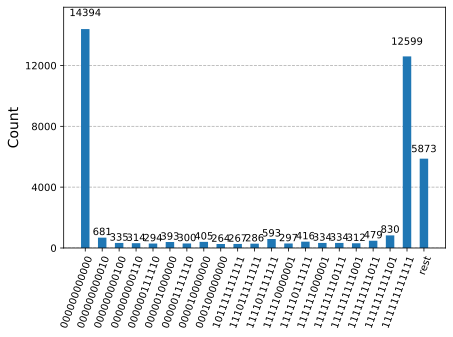

In [52]:
### 'DONE'になってから実行します ###
#from qiskit.visualization import plot_histogram
result = job.result()
plot_histogram(result[0].data.c.get_counts(), number_to_keep=20)

/Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/matplotlib.py:270: UserWarning: Style JSON file 'default.json' not found in any of these locations: /Users/ryuki/work/qenv202506/lib/python3.13/site-packages/qiskit/visualization/circuit/styles/default.json, ~/default.json, ~/.qiskit/default.json, default.json. Will use default style.
  self._style, def_font_ratio = load_style(


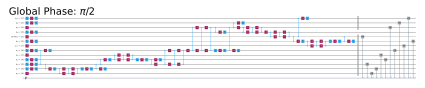

In [53]:
# 実機のバックエンドでの実行が最適な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False, fold=-1, scale=0.1)

In [54]:
print('Depth:', isa_circuit.depth())
print('Two-qubit Depth:', isa_circuit.depth(filter_function=lambda x: x.operation.num_qubits==2))

Depth: 72
Two-qubit Depth: 31


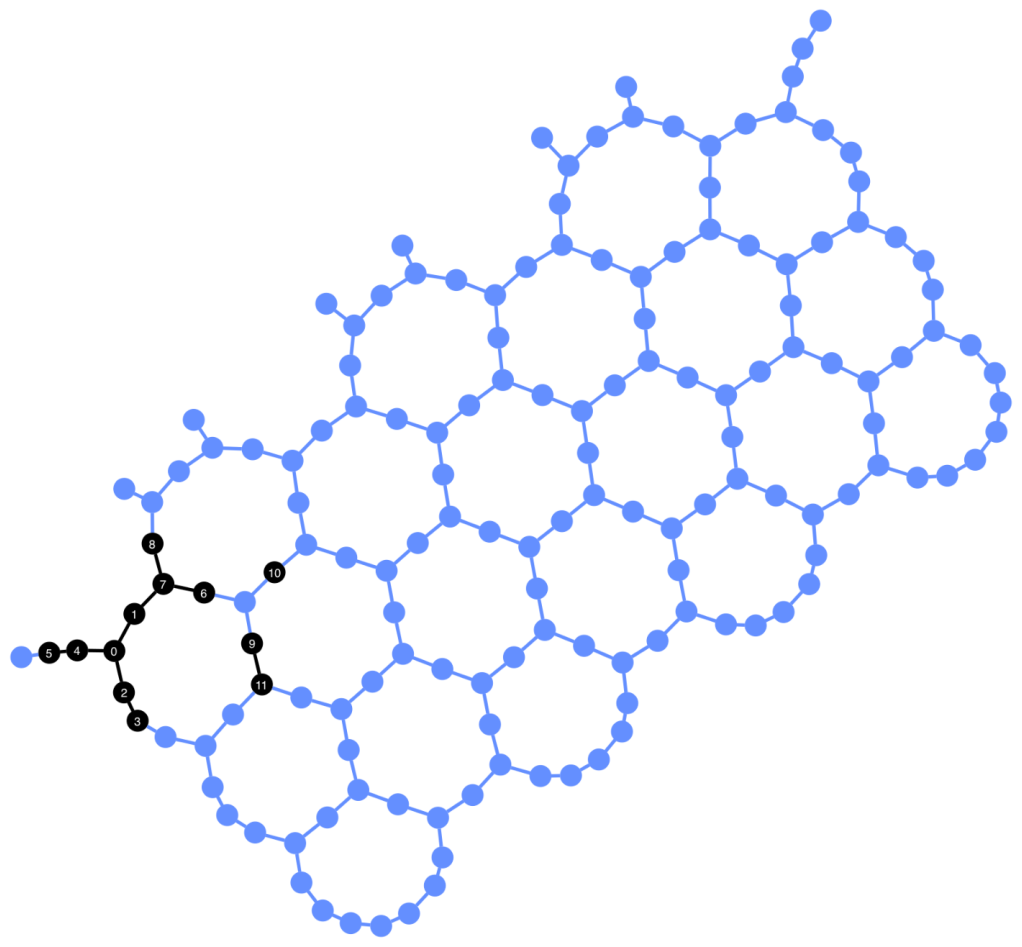

In [55]:
plot_circuit_layout(isa_circuit, backend)

In [56]:
sampler = SamplerV2(mode=backend)
shots = 40000
job = sampler.run([isa_circuit], shots = shots)
print("job id:", job.job_id())

job id: 4bb544e2-41bc-4150-92b1-9168057c47f8


In [58]:
#job = service.job(job.job_id()) 
#job = service.job("d33q9n50qhlc73cqqg1g") 
job.status() # ジョブの実行状態を確認します

<JobStatus.DONE: 'job has successfully run'>

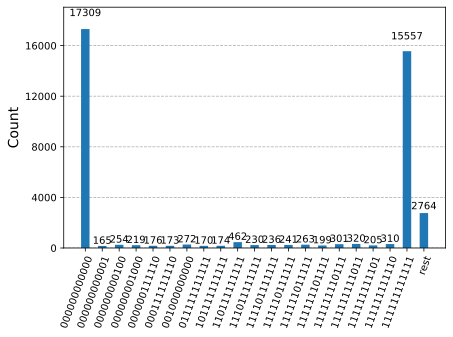

In [59]:
### 'DONE'になってから実行します ###
#from qiskit.visualization import plot_histogram
result = job.result()
plot_histogram(result[0].data.c.get_counts(), number_to_keep=20)

# Qiskitによる量子+HPC連携

## 一例として Sample-based Quantum Diagonalization (SQD) 
*) Robledo-Moreno, Javier, et al. arXiv:2405.05068

**) For QSCI - Kanno, Keita, et al. arXiv:2302.11320 

## SQDの最もベーシックな実装
[ここにある notebook](https://github.com/quantum-tokyo/UTokyo-komaba-school/blob/main/day2/20250930_8_chemi.ipynb)の「3. オプション：実機での実行」をご参照ください。

（「1.チュートリアル」「2.演習」ではハンズオン実行の簡便のために、量子コンピューターの実行結果として、あらかじめファイルに保存されたものを利用しています。量子コンピューターと古典コンピューターのそれぞれで処理を実行する量子+HPC連携という意味では、本来の処理の流れである「3. オプション：実機での実行」をご確認いただく必要があります。）

### コードのポイント

* 冒頭の `%pip install qiskit qiskit-ibm-runtime qiskit-addon-sqd` で qiskit-addon-sqd をインストールします。
* 「Step 2. 量子回路を作成します」の以下の命令のあたりで量子回路を作成しています。

```
# prepare Hartree-Fock state as the reference state and append it to the quantum circuit
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(num_orbitals, nelec), qubits)
```

* トランスパイル後 `sampler = Sampler(mode=backend, options=opts)` で量子コンピューター上でこの量子回路を実行しています。
* その実行結果を `result = diagonalize_fermionic_hamiltonian(...)` によって、このnotebookを実行している古典コンピューター自体の上で後処理しています。

## スーパーコンピューターMiyabiを利用した量子+HPC環境でのSQDの実装

実行することはできませんが、東京大学の古典スーパーコンピューターである [Miyabi](https://www.cc.u-tokyo.ac.jp/supercomputer/miyabi/service/) と量子コンピューター IBM Quantum System One ibm_kawasaki を組み合わせて量子+HPC環境として利用するプログラムを、[ここ](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.py)で参照することができます。

ここでは、Prefectというワークフロー管理ツールを利用することによって、量子コンピューターや古典コンピューターのリソースを不必要に占有しないようにしています。

上のベーシックな実装とは違い、(1) main.pyを実行するローカルの古典コンピューター、(2) 量子コンピューター ibm_kawasaki、(3) 古典スーパーコンピューター Miyabiの3システムを協調的に動作させて利用する仕組みになっています。

### コードのポイント
* [175行目](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.py#L175)の `@flow async def sqd_2405_05068(...)`によってワークフローの全体を定義しています。
* [221行目](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.py#L221)の `bit_array = await sample_bitstrings.with_options(...)`から呼ばれるサブルーチンが、そのワークフローの中で量子コンピューターを呼び出してサンプリング処理を実行する1タスクになっています。
    * [480行目](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.py#L480)の `lucj_circ = create_ansatz_circuits(...)`で回路を作って、その後にトランスパイルし、[495行目](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.py#L495)の `pub_result = await runtime.sampler(...)`で量子コンピューターで実行しています。
    * そこで量子コンピューターの実行待ちが発生します。
* 一方で、[272行目](https://github.com/ibm-quantum-collaboration/qii-miyabi-kawasaki/blob/main/algorithms/sqd/sqd_dice/main.pyL272)の `coro = sci_solver.run(...)`が、そのワークフローの中で古典スーパーコンピューターを呼び出して、対角化処理を実行する1タスクになっています。
    * Miyabi上のDICEというソルバーが呼ばれますが、その際に古典スーパーコンピューターMiyabiの実行待ちが発生します。